## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [71]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
data.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Как видим, пропусков нет.

1. status - категориальная (есть несколько категорий, не можем как-то ранжировать)
2. duration - количественная (кол-во месяцов)
3. credit_history - категориальная (есть несколько категорий, не можем как-то ранжировать)
4. purpose - категориальная (есть несколько категорий, не можем как-то ранжировать)
5. amount - количественная (размер кредита)
6. savings - категориальная (есть несколько категорий, не можем как-то ранжировать)
7. employment_duration - порядковая (категории, которые можно ранжировать)
8. installment_rate - порядковая (категории, которые можно ранжировать)
9. personal_status_sex - категориальная (есть несколько категорий, не можем как-то ранжировать)
10. other_debtors - категориальная (есть несколько категорий, не можем как-то ранжировать)
11. present_residence - порядковая (категории, которые можно ранжировать)
12. property - категориальная (есть несколько категорий, не можем как-то ранжировать)
13. age - количественная (возраст, лет)
14. other_installment_plans - категориальная (есть несколько категорий, не можем как-то ранжировать)
15. housing - категориальная (есть несколько категорий, не можем как-то ранжировать)
16. number_credits - порядковая (категории, которые можно ранжировать)
17. job - категориальная (есть несколько категорий, не можем как-то ранжировать)
18. people_liable - порядковая (категории, которые можно ранжировать)
19. telephone - бинарная (да/нет)
20. foreign_worker - бинарная (да/нет)
21. credit_risk - бинарная (да/нет, хороший/плохой)

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [5]:
data.groupby(['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [6]:
data.loc[(data['age']<30) & (data['housing']=='rent')].shape[0] / data.loc[(data['age']<30)].shape[0] * 100

66.66666666666666

In [7]:
data.loc[(data['age']>40) & (data['housing']=='rent')].shape[0] / data.loc[(data['age']>40)].shape[0] * 100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [19]:
data.loc[(data['foreign_worker']=='yes') & (data['number_credits']!='1') & (data['number_credits']!='2-3')].shape[0]

1

### Задание 6 (1 балл)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

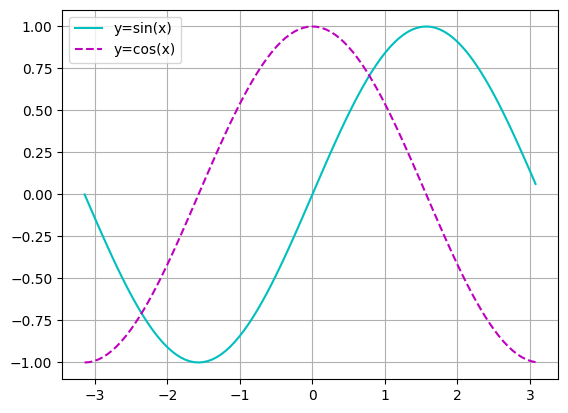

In [37]:
x = np.arange(-np.pi, np.pi, 2*np.pi/100)
plt.plot(x, np.sin(x), 'c-', label='y=sin(x)')
plt.plot(x, np.cos(x), 'm--', label='y=cos(x)')
plt.legend()
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

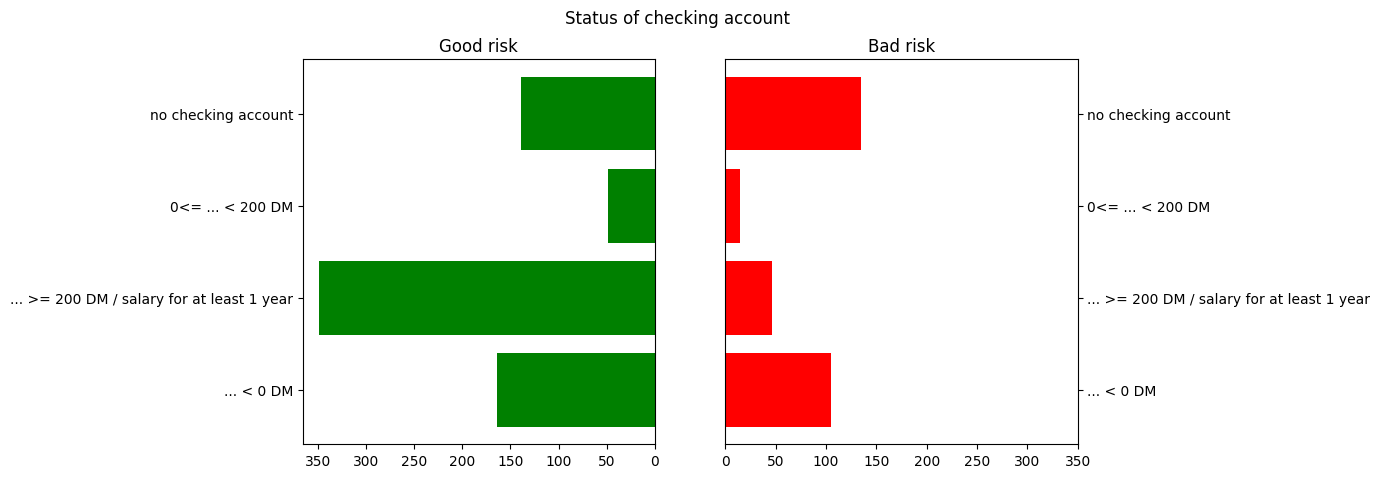

In [101]:
good_risk = data[data['credit_risk']=='good'].value_counts(subset='status')
bad_risk = data[data['credit_risk']=='bad'].value_counts(subset='status')

fig, axes = plt.subplots(figsize=(10,5), ncols=2)
fig.suptitle('Status of checking account')
axes[0].barh(good_risk.sort_index().index, good_risk.sort_index().values, color='g')
axes[0].set_title('Good risk')
axes[0].set_xticks(range(0, 351, 50))
axes[0].invert_xaxis()
axes[1].barh(bad_risk.sort_index().index, bad_risk.sort_index().values, color='r')
axes[1].set_title('Bad risk')
axes[1].set_xticks(range(0, 351, 50))
axes[1].yaxis.tick_right()
plt.show()

На графике мы видим распределение размера текущего счёта для положительных и отрицательных кейсов. Стоит отметить, что категория >= 200 DM является модой для положительных кейсов (>= 200DM составляет большинство положительных кейсов).

### Задание 8  (0.5 балла)

In [12]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot: xlabel='savings', ylabel='count'>

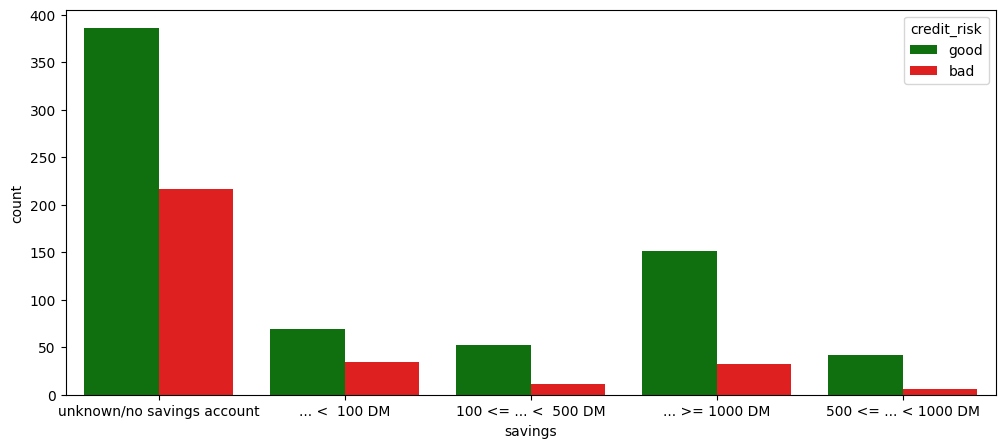

In [99]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(ax=ax, x='savings', data=data, hue='credit_risk', palette=['g', 'r'])

На графике мы видим распределение размера сберегательного счёта для положительных и отрицательных кейсов. Стоит отметить, что unknown/no savings account является модой для обеих категорий кейсов. Среди других размеров сберегательного счёта выделяется >= 1000 DM, т.к. является модой для положительных кейсов, если не учитывать категорию unknown. Распределение для отрицательных кейсов без учета unknown является бимодальным (моды >= 1000 DM, < 100 DM). Всё это делает эту категорию не очень простой для классификации.

С точки зрения трудоёмкости написания кода, seaborn сильно проще. Однако matplotlib предлагает более гибкую кастомизацию графиков, что позволяет строить более наглядные графики.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot: xlabel='savings', ylabel='age'>

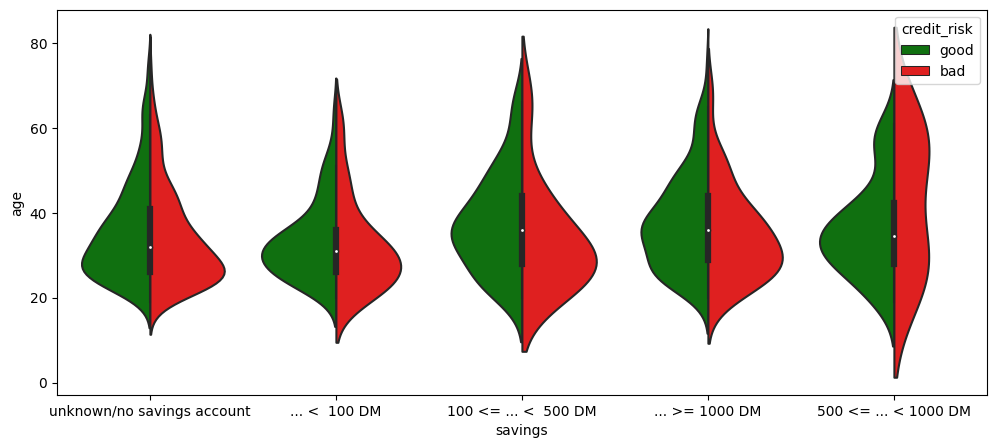

In [8]:
fig, ax = plt.subplots(figsize=(12,5))
sns.violinplot(ax=ax, x='savings', y='age', data=data, hue='credit_risk', split=True, palette=['g', 'r'])

На графике мы видим распределения по возрасту для разных размеров сберегательного счёта, а также деление распределений на положительные и отрицательные кейсы. Стоит отметить, что распределения по возросту сильно отличаются, в зависимости от размера сберегательногт счёта и статуса кейса, что делает сочетание переменных age и savings удачным для классификации.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

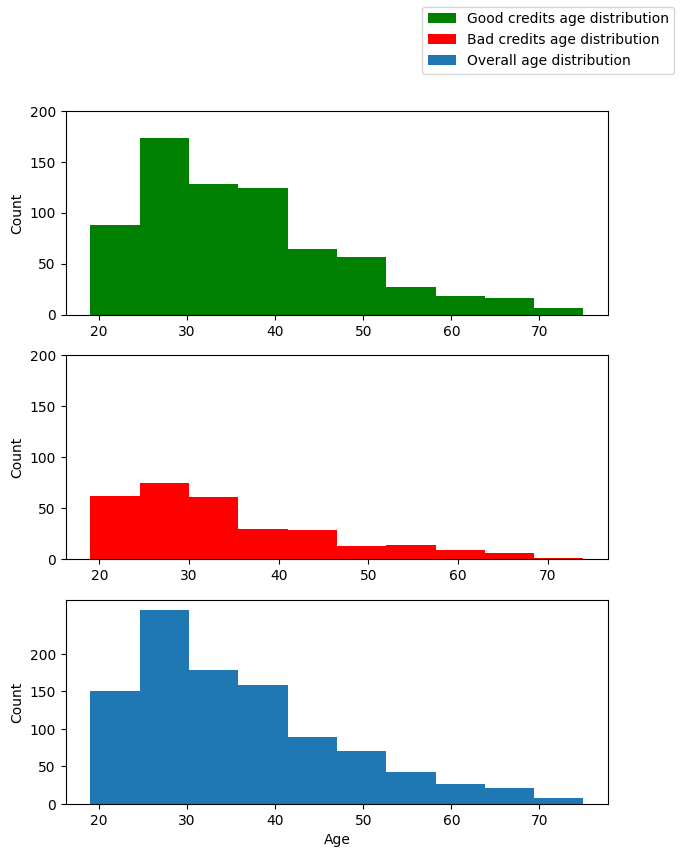

In [14]:
fig, axes = plt.subplots(figsize=(7,9), nrows=3)
axes[0].hist(data[data['credit_risk']=='good']['age'], label='Good credits age distribution', color='g')
axes[0].set_xticks(range(20, 71, 10))
axes[0].set_yticks(range(0, 201, 50))
axes[0].set_ylabel('Count')
axes[1].hist(data[data['credit_risk']=='bad']['age'], label='Bad credits age distribution', color='r')
axes[1].set_xticks(range(20, 71, 10))
axes[1].set_yticks(range(0, 201, 50))
axes[1].set_ylabel('Count')
axes[2].hist(data['age'], label='Overall age distribution')
axes[2].set_xticks(range(20, 71, 10))
axes[2].set_yticks(range(0, 201, 50))
axes[2].set_ylabel('Count')
plt.xlabel('Age')
fig.legend(loc='upper right')
plt.show()

На графике мы видим распределения возрастов для положительных и отрицательных кейсов, а также общее распределение. Распределения для положительных и отрицательных кейсов очень похожи, однако различаются по размерности (положительных кейсов больше для каждого возраста) (это плохо для классификации).

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

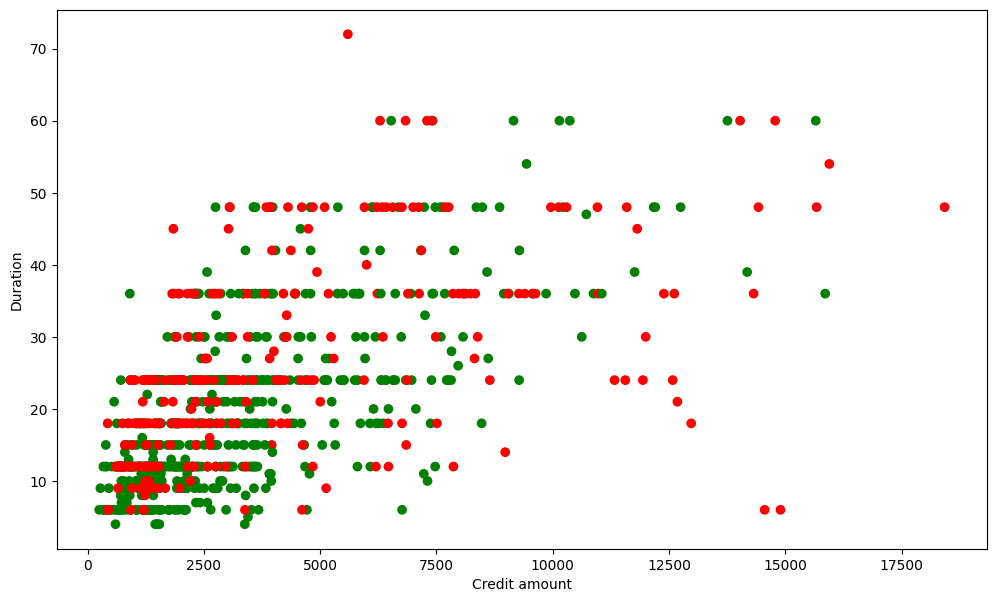

In [24]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x=data['amount'], y=data['duration'], c=data[''].map({'good':'g','bad':'r'}))
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.show()

На графике мы видим разброс кейсов, в зависимости от длительности кредита и его размера. Можно отметить, что чёткие группы выделить сложно.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

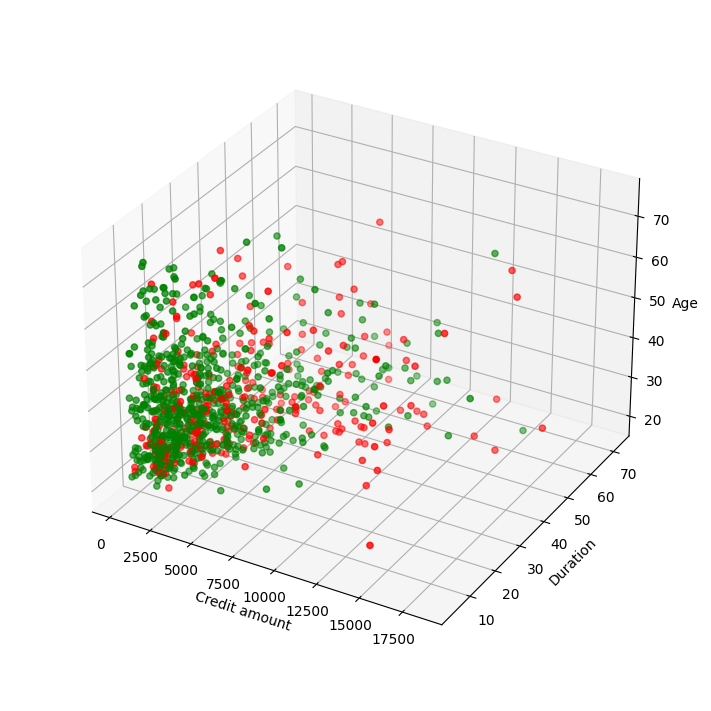

In [12]:
fig = plt.figure(figsize=(12,7), layout='constrained')
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=data['amount'], ys=data['duration'], zs=data['age'], c=data['credit_risk'].map({'good':'g','bad':'r'}))
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
ax.set_box_aspect(None, zoom=0.9) # уменьшили масштаб, чтобы не обрезались подписи
plt.show()

На графике мы видим разброс кейсов в зависимости от возраста, длительности кредита и его размера. Как и с предыдущим графиком, группы выделить сложно.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [72]:
data = data.drop(['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'], axis=1)

Мы избавились от категориальных признаков.

In [73]:
data.loc[data['telephone'] == 'no', 'telephone'] = 0
data.loc[data['telephone'] == 'yes (under customer name)', 'telephone'] = 1

data.loc[data['foreign_worker'] == 'no', 'foreign_worker'] = 0
data.loc[data['foreign_worker'] == 'yes', 'foreign_worker'] = 1

data.loc[data['credit_risk'] == 'bad', 'credit_risk'] = 0
data.loc[data['credit_risk'] == 'good', 'credit_risk'] = 1

Мы представили бинарные признаки в виде 0/1.

In [74]:
data.loc[data['employment_duration'] == 'unemployed', 'employment_duration'] = 0
data.loc[data['employment_duration'] == '< 1 yr', 'employment_duration'] = 1
data.loc[data['employment_duration'] == '1 <= ... < 4 yrs', 'employment_duration'] = 2
data.loc[data['employment_duration'] == '4 <= ... < 7 yrs', 'employment_duration'] = 3
data.loc[data['employment_duration'] == '>= 7 yrs', 'employment_duration'] = 4

In [75]:
data.loc[data['installment_rate'] == '< 20', 'installment_rate'] = 0
data.loc[data['installment_rate'] == '20 <= ... < 25', 'installment_rate'] = 1
data.loc[data['installment_rate'] == '25 <= ... < 35', 'installment_rate'] = 2
data.loc[data['installment_rate'] == '>= 35', 'installment_rate'] = 3

In [76]:
data.loc[data['present_residence'] == '< 1 yr', 'present_residence'] = 0
data.loc[data['present_residence'] == '1 <= ... < 4 yrs', 'present_residence'] = 1
data.loc[data['present_residence'] == '4 <= ... < 7 yrs', 'present_residence'] = 2
data.loc[data['present_residence'] == '>= 7 yrs', 'present_residence'] = 3

In [77]:
data.loc[data['number_credits'] == '1', 'number_credits'] = 0
data.loc[data['number_credits'] == '2-3', 'number_credits'] = 1
data.loc[data['number_credits'] == '4-5', 'number_credits'] = 2
data.loc[data['number_credits'] == '>= 6', 'number_credits'] = 3

In [78]:
data.loc[data['people_liable'] == '0 to 2', 'people_liable'] = 0
data.loc[data['people_liable'] == '3 or more', 'people_liable'] = 1

Мы представили порядковые признаки в формате {0, ..., n - 1}.

In [79]:
data

,duration,amount,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,1,0,3,21,0,0,0,0,1
1,9,2799,2,2,1,36,1,1,0,0,1
2,12,841,3,2,3,23,0,0,0,0,1
3,12,2122,2,1,1,39,1,1,0,1,1
4,12,2171,2,0,3,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,2,2,3,21,0,1,0,0,0
996,24,2303,4,0,0,45,0,0,0,0,0
997,21,12680,4,0,3,30,0,0,1,0,0
998,12,6468,0,2,0,52,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [43]:
def normalize(matrix: np.array) -> np.array:
    return (matrix - np.mean(matrix, axis=0)) / np.std(matrix, axis=0)

In [125]:
data_norm = pd.DataFrame(data=normalize(np.int64(data[data.columns.difference(['credit_risk'])].to_numpy())), columns=data[data.columns.difference(['credit_risk'])].columns)

Мы нормализовали все столбцы, кроме credit_risk.

In [126]:
data_norm['credit_risk'] = np.int64(data['credit_risk'])

In [127]:
data_norm

,age,amount,duration,employment_duration,foreign_worker,installment_rate,number_credits,people_liable,present_residence,telephone,credit_risk
0,-1.281573,-0.787657,-0.240857,-1.145978,-0.196014,-0.918477,-0.704926,-0.428290,1.046987,-0.823318,1
1,0.040363,-0.167384,-0.987573,-0.317959,-0.196014,0.870183,1.027079,2.334869,-0.765977,-0.823318,1
2,-1.105315,-0.861381,-0.738668,0.510060,-0.196014,0.870183,-0.704926,-0.428290,1.046987,-0.823318,1
3,0.304750,-0.407341,-0.738668,-0.317959,5.101669,-0.024147,1.027079,2.334869,-0.765977,-0.823318,1
4,0.216621,-0.389974,-0.738668,-0.317959,5.101669,-0.918477,1.027079,-0.428290,1.046987,-0.823318,1
...,...,...,...,...,...,...,...,...,...,...,...
995,-1.281573,-0.455191,0.256953,-0.317959,-0.196014,0.870183,-0.704926,2.334869,1.046987,-0.823318,0
996,0.833525,-0.343187,0.256953,1.338078,-0.196014,-0.918477,-0.704926,-0.428290,-1.672459,-0.823318,0
997,-0.488411,3.334852,0.008048,1.338078,-0.196014,-0.918477,-0.704926,-0.428290,1.046987,1.214598,0
998,1.450428,1.133062,-0.738668,-1.973997,-0.196014,0.870183,-0.704926,-0.428290,-1.672459,1.214598,0


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [170]:
def predict(Xtest: np.array) -> np.array:
    preds = np.array([])
    for i in Xtest:
        preds = np.append(preds, np.where(abs(i).sum()<4, 1, 0))
    return np.int64(preds)

In [148]:
X = data_norm[['amount', 'duration', 'age']].values
y = data_norm['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

В качестве параметров мы оставили лишь значения 'amount', 'duration', 'age', т.к. исходя из диаграммы рассеивания по этим параметрам выше основное количество положительных кейсов сгруппированны в одной точке, а отрицательные кейсы имеют большой разброс (т.е. кейсы сгруппированные близко к норме/мат. ожиданию в большинстве своём положительные, а те что далеко от нормы - отрицательные). По этой зависимости мы построим предсказания: проссумируем эти нормализованные параметры, если сумма будет слишком большой - кейс отрицательный (большое отклонение от нормы), если сумма небольшая - кейс положительный (сгруппирован близко к норме.)

In [171]:
accuracy_score(y_train, predict(X_train))

0.7013333333333334

Гиперпараметр для нашего предсказания (<4) подбираем на тренировочной выборке.

In [172]:
accuracy_score(y_test, predict(X_test))

0.664

Как видим, точность получилась >0.6.